In [55]:
# import the basic library
import os
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import chardet

In [56]:
df=pd.read_csv("online_shoppers_intention.csv",encoding="unicode_escape")
df.shape

(12330, 18)

In [57]:
df.head(10)
df[df['SpecialDay (probability)']>0]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
11,0,0.0,0,0.0,16,407.750000,0.018750,0.025833,0.000000,0.4,Feb,1,1,4,3,Returning_Visitor,False,False
20,0,0.0,0,0.0,8,136.166667,0.000000,0.008333,0.000000,1.0,Feb,2,2,5,1,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5439,1,149.5,0,0.0,32,1562.333333,0.038710,0.062581,7.636645,0.2,May,2,2,3,2,Returning_Visitor,False,False
5448,3,35.5,0,0.0,14,241.769231,0.000000,0.020417,0.000000,0.6,May,3,2,3,2,Returning_Visitor,False,False
5450,2,42.0,0,0.0,17,275.702381,0.040000,0.060000,0.000000,0.6,May,3,2,8,2,Returning_Visitor,False,False
5453,2,76.0,1,79.0,35,2072.666667,0.007207,0.031081,8.100000,0.8,May,2,4,7,2,Returning_Visitor,False,False


In [58]:
df.info()

##Month object to date
##Visitr type to categoricals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

In [59]:
df.nunique()

Administrative                27
Administrative_Duration     3335
Informational                 17
Informational_Duration      1258
ProductRelated               311
ProductRelated_Duration     9551
BounceRates in %            1872
ExitRates in %              4777
PageValues                  2704
SpecialDay (probability)       6
Month                         10
OperatingSystems               8
Browser                       13
Region                         9
TrafficType                   20
VisitorType                    3
Weekend                        2
Revenue                        2
dtype: int64

In [60]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [61]:
df.isnull().sum(axis=0)

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates in %            0
ExitRates in %              0
PageValues                  0
SpecialDay (probability)    0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

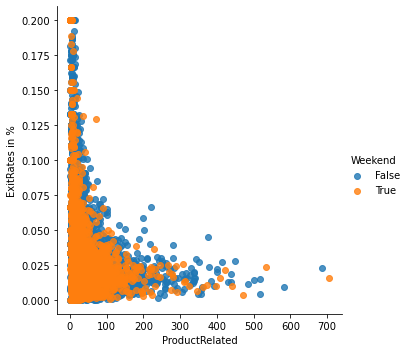

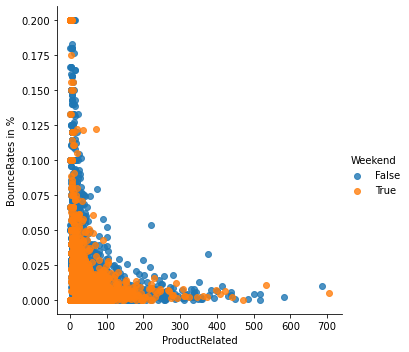

In [174]:
sns.lmplot('ProductRelated','ExitRates in %',data=df,hue='Weekend',fit_reg=False)
plt.show()
sns.lmplot('ProductRelated','BounceRates in %',data=df,hue='Weekend',fit_reg=False)
plt.show()

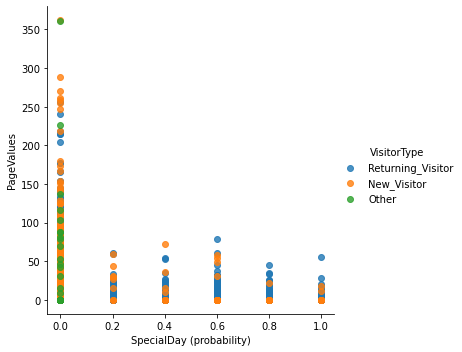

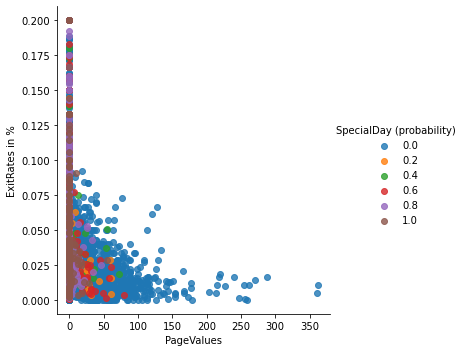

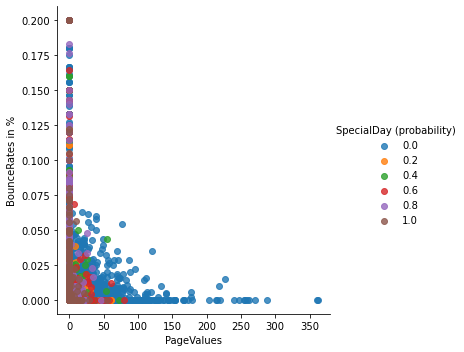

In [162]:
sns.lmplot('SpecialDay (probability)','PageValues',data=df,hue='VisitorType',fit_reg=False)
plt.show()
sns.lmplot('PageValues','ExitRates in %',data=df,hue='SpecialDay (probability)',fit_reg=False)
plt.show()
sns.lmplot('PageValues','BounceRates in %',data=df,hue='SpecialDay (probability)',fit_reg=False)
plt.show()

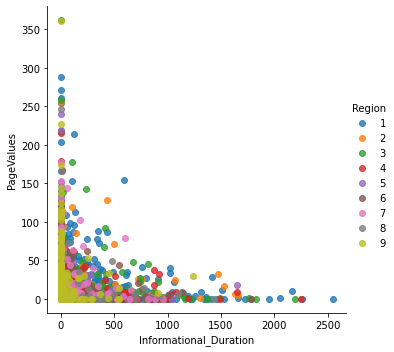

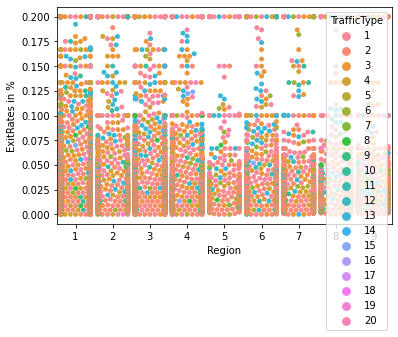

In [173]:
sns.lmplot('Informational_Duration','PageValues',data=df,hue='Region',fit_reg=False)
plt.show()
sns.swarmplot('Region','ExitRates in %',data=df,hue='TrafficType')
plt.show()

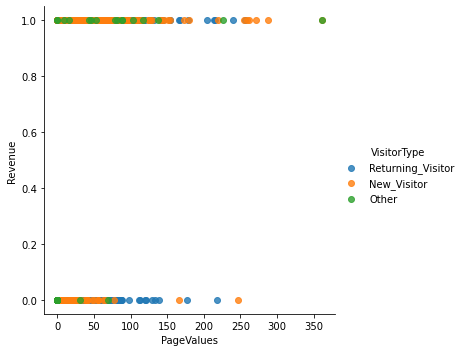

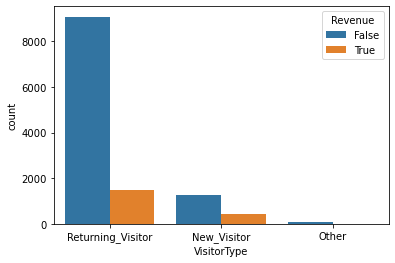

In [63]:
sns.lmplot('PageValues','Revenue',data=df,hue='VisitorType',fit_reg=False)
plt.show()
sns.countplot('VisitorType',data=df,hue='Revenue')
plt.show()

# ENCODING

In [64]:
# creating instance of one-hot-encoder
enc = OneHotEncoder()
enc.fit(df)

#Encoding Visitor Type Column

# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['VisitorType']]).toarray(),columns=np.array(enc.categories_).ravel())
# merge with main df on key values
df = df.join(enc_df)


In [65]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [66]:
def mon_to_num (mn):
    names=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    dt_months = {names[i]:i+1 for i in range(len(names))}
    return dt_months[mn]
    

In [67]:
##Changing the month name 'June' to 'Jun'
df.loc[df['Month'] == 'June', 'Month']='Jun' 

In [68]:
df['Month'] = df['Month'].apply(mon_to_num)

In [69]:
df['Month'] = df['Month'].astype('int')
df['Month'].unique()

array([ 2,  3,  5, 10,  6,  7,  8, 11,  9, 12])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  int32  
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

In [71]:
df1 = df.drop(columns=['VisitorType','Other','OperatingSystems','Browser'])

In [72]:
df1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,Region,TrafficType,New_Visitor,Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,3.147364,4.069586,0.137388,0.855718
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,2.401591,4.025169,0.344271,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,1.000000,2.000000,0.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,3.000000,2.000000,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,4.000000,4.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,9.000000,20.000000,1.000000,1.000000


In [73]:
df1['Weekend']=df1['Weekend'].astype('int')
df1['Revenue']=df1['Revenue'].astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  int32  
 11  Region                    12330 non-null  int64  
 12  TrafficType               12330 non-null  int64  
 13  Weekend                   12330 non-null  int32  
 14  Revenu

# Outliers Treatment

<AxesSubplot:>

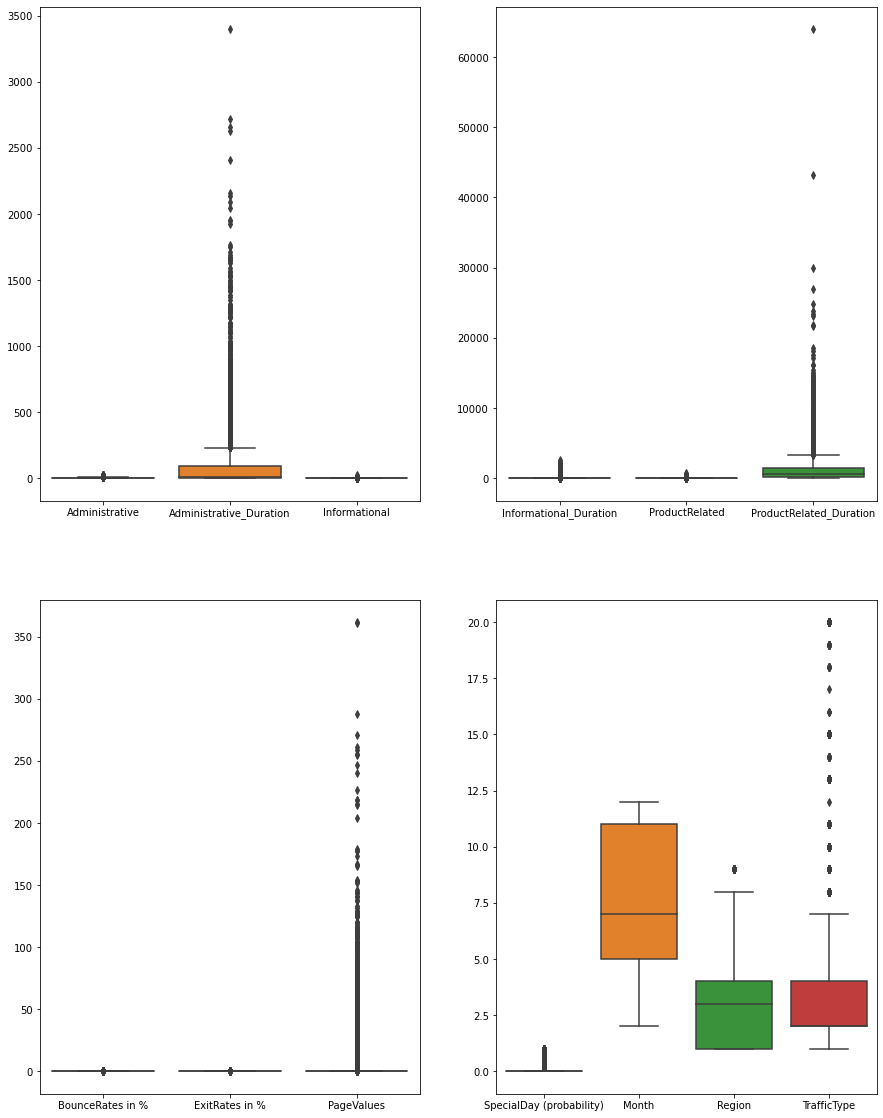

In [74]:
##Checking for outliers in the data fields.
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15,20))
#fig, axes = plt.subplots(4, int(c), sharex=True, figsize=(15,20))
#fig.suptitle('Bigger 1 row x 2 columns axes with no data')


sns.boxplot(data=df1.iloc[:,0:3],  ax=axes[0,0])
sns.boxplot(data=df1.iloc[:,3:6],  ax=axes[0,1])
sns.boxplot(data=df1.iloc[:,6:9],  ax=axes[1,0])
sns.boxplot(data=df1.iloc[:,9:13],  ax=axes[1,1])

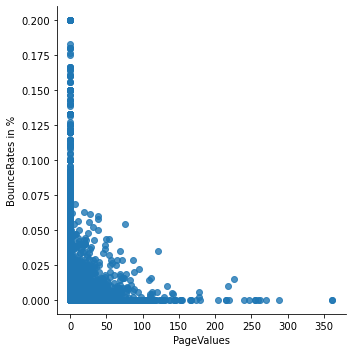

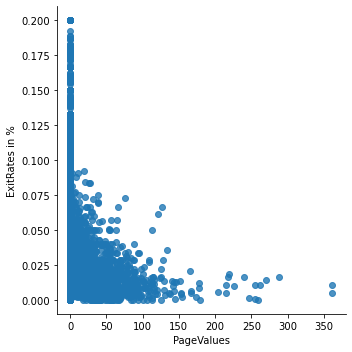

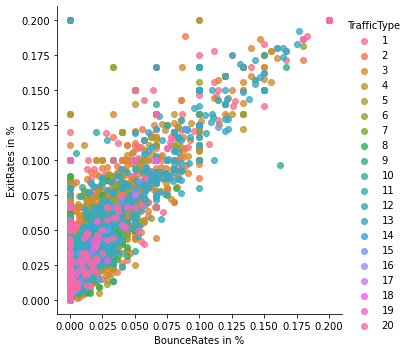

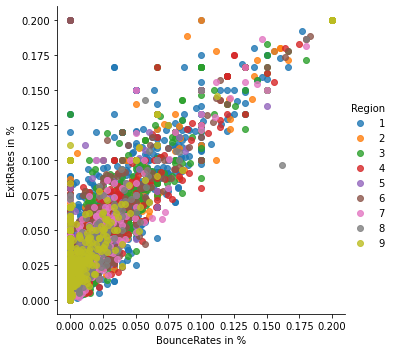

In [181]:
#fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,8))


sns.lmplot('PageValues','BounceRates in %',data=df, fit_reg=False)
sns.lmplot('PageValues','ExitRates in %',data=df, fit_reg=False)
sns.lmplot('BounceRates in %','ExitRates in %',data=df, fit_reg=False, hue='TrafficType')
sns.lmplot('BounceRates in %','ExitRates in %',data=df, fit_reg=False, hue='Region')


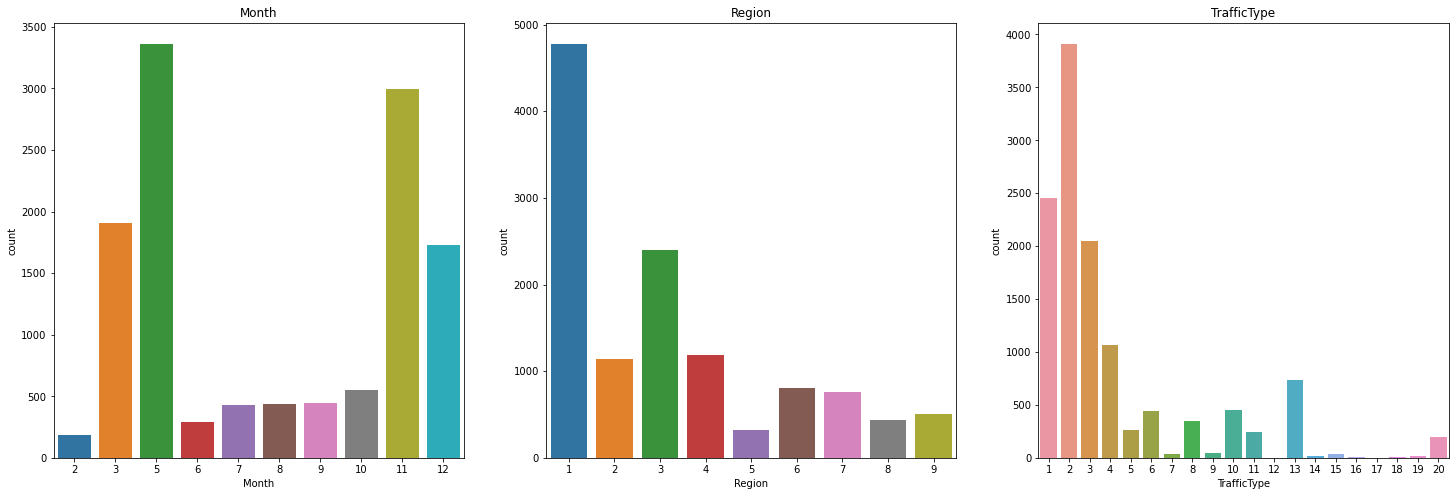

In [76]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(25,8))

p1=sns.countplot(x='Month', data=df1, ax=ax1)

ax1.set_title('Month')
#plt.show()
p2=sns.countplot(x='Region', data=df1, ax=ax2)
ax2.set_title('Region')
p3=sns.countplot(x='TrafficType', data=df1, ax=ax3)
ax3.set_title('TrafficType')
plt.show()

<AxesSubplot:xlabel='PageValues', ylabel='Count'>

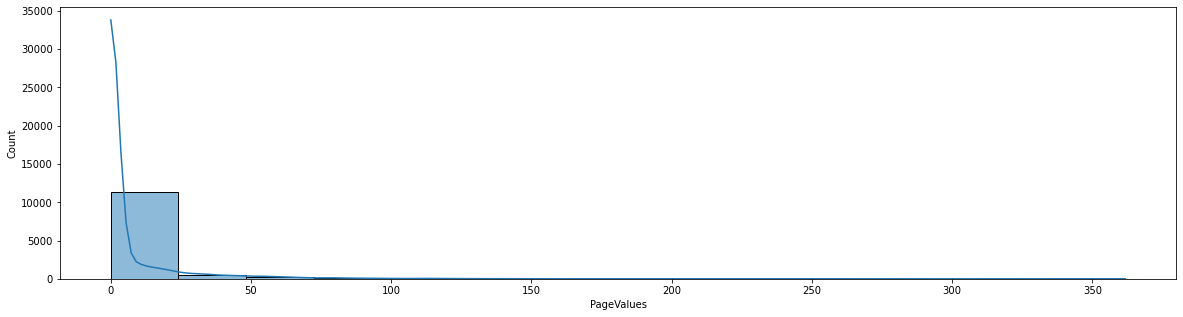

In [182]:
plt.figure(figsize=(20,5))
sns.histplot(x='PageValues',data=df, kde=True)

In [78]:
df2 = df1.iloc[:,0:10]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 963.4 KB


# OUTLIERS TREATMENT - IQR Technique

In [79]:
## Dropping the columns 'Revenue', 'New_Visitor', 'Returning_Visitor' for correlation analysis.
#df2 = df1.iloc[:,0:14]

Q1=df2.quantile(0.25)
print
Q3=df2.quantile(0.75)
IQR=Q3-Q1
upper_limit=(Q3+1.5*IQR)
print("upper_limit....######")
print(upper_limit)
lower_limit=(Q1-1.5*IQR)
print("lower_limit....########")
print(lower_limit)

upper_limit....######
Administrative                10.000000
Administrative_Duration      233.140625
Informational                  0.000000
Informational_Duration         0.000000
ProductRelated                84.500000
ProductRelated_Duration     3384.186784
BounceRates in %               0.042031
ExitRates in %                 0.103571
PageValues                     0.000000
SpecialDay (probability)       0.000000
dtype: float64
lower_limit....########
Administrative                -6.000000
Administrative_Duration     -139.884375
Informational                  0.000000
Informational_Duration         0.000000
ProductRelated               -39.500000
ProductRelated_Duration    -1735.892070
BounceRates in %              -0.025219
ExitRates in %                -0.039286
PageValues                     0.000000
SpecialDay (probability)       0.000000
dtype: float64


In [80]:
## Capping the outliers
df2.drop(columns=['Informational','Informational_Duration','PageValues','SpecialDay (probability)'])
outliers = df2[(df2 < lower_limit) | (df2 > upper_limit)]
df2 = np.clip(df2, lower_limit, upper_limit, axis=1)

In [81]:
df2.shape

(12330, 10)

In [82]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability)
0,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0
2,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0
3,0,0.0,0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0


In [83]:
df2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability)
count,12330.000000,12330.000000,12330.0,12330.0,12330.000000,12330.000000,12330.000000,12330.000000,12330.0,12330.0
mean,2.198783,56.972776,0.0,0.0,26.696229,989.691454,0.010929,0.036452,0.0,0.0
std,2.924632,79.250727,0.0,0.0,25.155967,1033.120180,0.014875,0.030513,0.0,0.0
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,0.0,0.0,7.000000,184.137500,0.000000,0.014286,0.0,0.0
50%,1.000000,7.500000,0.0,0.0,18.000000,598.936905,0.003112,0.025156,0.0,0.0
75%,4.000000,93.256250,0.0,0.0,38.000000,1464.157214,0.016813,0.050000,0.0,0.0
max,10.000000,233.140625,0.0,0.0,84.500000,3384.186784,0.042031,0.103571,0.0,0.0


<AxesSubplot:>

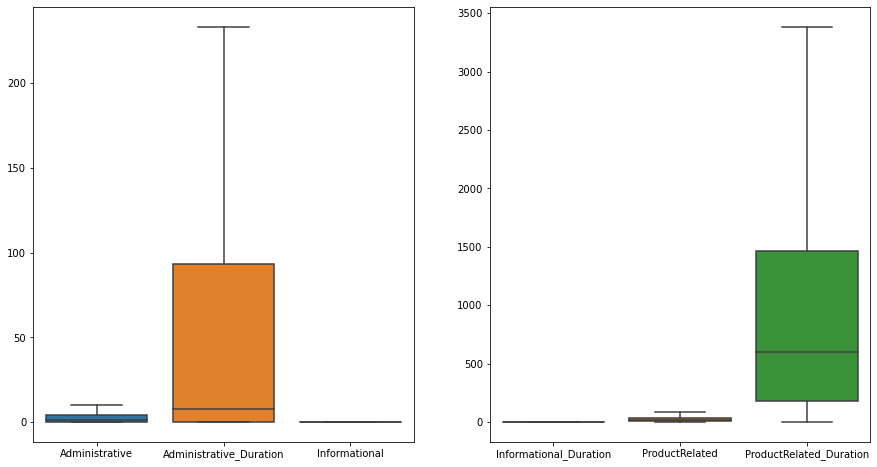

In [178]:
##Visulaizing Data after capping the outliers

fig, axes = plt.subplots(1, 2, figsize=(15,8))


sns.boxplot(data=df2.iloc[:,0:3],  ax=axes[0])
sns.boxplot(data=df2.iloc[:,3:6],  ax=axes[1])
#sns.boxplot(data=df2.iloc[:,6:9],  ax=axes[1,0])
#sns.boxplot(data=df2.iloc[:,9:13],  ax=axes[1,1])


In [85]:
print(df2.columns)

colname_addback=[i  for i in df1.columns if i not in df2.columns]
for cn in colname_addback:
    df2[cn] = df1[cn]
print('Columns of df2 after capping outliers: ',df2.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates in %', 'ExitRates in %', 'PageValues',
       'SpecialDay (probability)'],
      dtype='object')
Columns of df2 after capping outliers:  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates in %', 'ExitRates in %', 'PageValues',
       'SpecialDay (probability)', 'Month', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'New_Visitor', 'Returning_Visitor'],
      dtype='object')


<AxesSubplot:xlabel='Region', ylabel='count'>

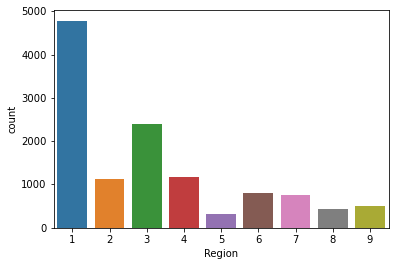

In [183]:

sns.countplot('Region',data=df1)


In [87]:
df2.shape

(12330, 17)

# Checking data for multi-collinearity

In [88]:
df2_corr=df2.corr()
df2_corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,Region,TrafficType,Weekend,Revenue,New_Visitor,Returning_Visitor
Administrative,1.000000,0.818375,NaN,NaN,0.451271,0.400708,-0.233064,-0.379997,NaN,NaN,0.097263,-0.003259,-0.039097,0.026905,0.146514,0.044730,-0.038623
Administrative_Duration,0.818375,1.000000,NaN,NaN,0.364859,0.357780,-0.215582,-0.361485,NaN,NaN,0.091545,0.012873,-0.027106,0.036349,0.137260,0.074989,-0.068411
Informational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Informational_Duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductRelated,0.451271,0.364859,NaN,NaN,1.000000,0.854596,-0.231205,-0.440969,NaN,NaN,0.167384,-0.032050,-0.058319,0.025406,0.179402,-0.142640,0.152107
ProductRelated_Duration,0.400708,0.357780,NaN,NaN,0.854596,1.000000,-0.211213,-0.392429,NaN,NaN,0.156465,-0.017820,-0.053805,0.011779,0.191169,-0.142412,0.149178
BounceRates in %,-0.233064,-0.215582,NaN,NaN,-0.231205,-0.211213,1.000000,0.755036,NaN,NaN,-0.059991,-0.018370,0.099520,-0.045369,-0.180547,-0.225188,0.223588
ExitRates in %,-0.379997,-0.361485,NaN,NaN,-0.440969,-0.392429,0.755036,1.000000,NaN,NaN,-0.104738,-0.013081,0.087805,-0.068484,-0.239395,-0.228226,0.217978
PageValues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SpecialDay (probability),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

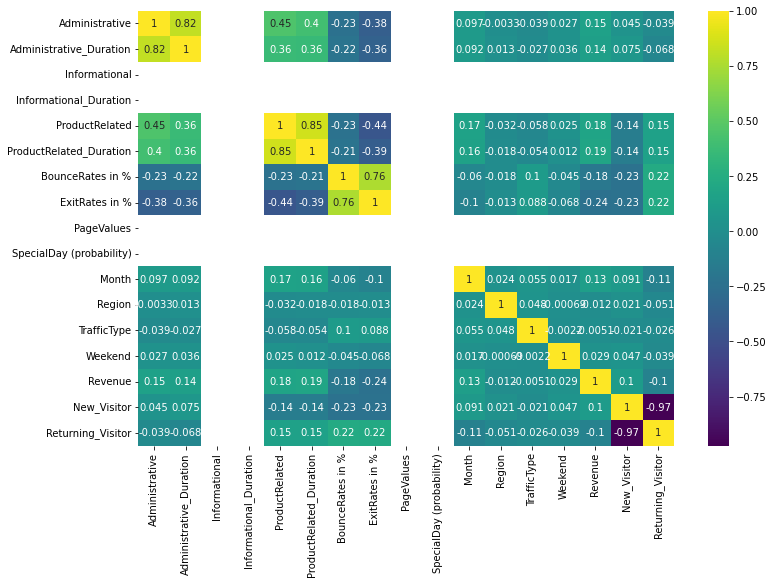

In [89]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(), annot=True, cmap='viridis')

In [90]:
VIF1 = pd.DataFrame()
f=df1#.loc[:,['Informational','Informational_Duration','PageValues','SpecialDay (probability)']]
VIF1['feature'] = f.columns
VIF1['VIF'] = [variance_inflation_factor(f.values, i) for i in range(f.shape[1])]
VIF1

,feature,VIF
0,Administrative,2.884327
1,Administrative_Duration,2.045177
2,Informational,2.119157
3,Informational_Duration,1.779054
4,ProductRelated,6.728240
5,ProductRelated_Duration,6.023829
6,BounceRates in %,7.654415
7,ExitRates in %,12.512671
8,PageValues,1.475200
9,SpecialDay (probability),1.197661


In [91]:
VIF = pd.DataFrame()
VIF['feature'] = df2.columns
VIF['VIF'] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
VIF

,feature,VIF
0,Administrative,5.207441
1,Administrative_Duration,4.725123
2,Informational,NaN
3,Informational_Duration,NaN
4,ProductRelated,8.949440
5,ProductRelated_Duration,7.286942
6,BounceRates in %,3.698675
7,ExitRates in %,7.230289
8,PageValues,NaN
9,SpecialDay (probability),NaN


In [92]:
#df2 = df2.drop(columns=['ProductRelated'])

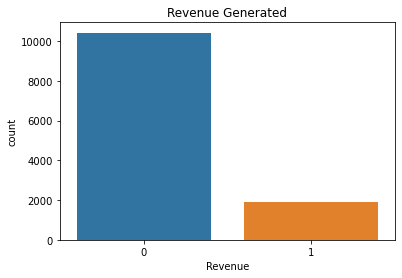

In [93]:
#Plotting the difference betweeen revenue generated or not

sns.countplot(df1['Revenue'])
plt.title('Revenue Generated')
plt.show()

There is the problem of imbalenced dataset for Target field i.e. Revenue. We address the imbalenced dataset issue by using oversampling techniques.

<AxesSubplot:xlabel='Revenue', ylabel='count'>

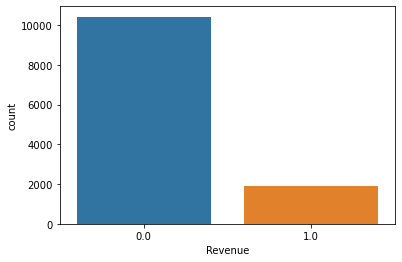

In [94]:
df1_y = df2['Revenue']
df1_y = df1_y.astype('float64')

df1_X = df2.iloc[:,df2.columns!='Revenue']
sns.countplot(df1_y)

# TEST TRAIN SPLIT

<AxesSubplot:xlabel='Revenue', ylabel='count'>

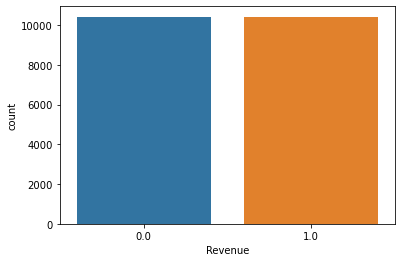

In [95]:
## Using SMOTE technique to balence data:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority')
X_smote, y_smote = sm.fit_resample(df1_X, df1_y)
sns.countplot(y_smote)

In [187]:
print('Value counts of the imbalanced dataset:')
df2['Revenue'].value_counts()

Value counts of the imbalanced dataset:


0    10422
1     1908
Name: Revenue, dtype: int64

In [186]:
#X_train, X_test, y_train, y_test = train_test_split(df1_X, df1_y, random_state=104 ,train_size=0.8, shuffle=False)
print('Value counts of the balanced dataset:')
y_smote.value_counts()

Value counts of the balanced dataset:


0.0    10422
1.0    10422
Name: Revenue, dtype: int64

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state=14 ,train_size=0.75, shuffle=True)

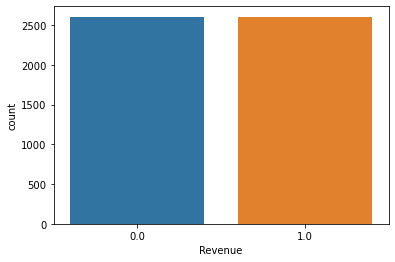

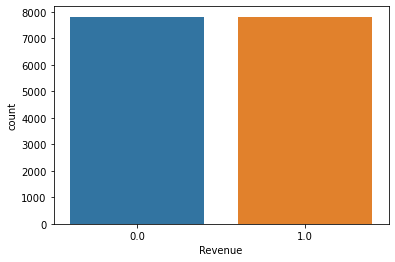

In [99]:
sns.countplot(y_test)
plt.show()
sns.countplot(y_train)
plt.show()

In [100]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn>=1.0.2 in c:\users\swastik\anaconda3\lib\site-packages (from imbalanced-learn) (1.2.1)



In [188]:
print(X_train.shape)
print(y_train.shape)

(15633, 16)
(15633,)


In [102]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

nm = MinMaxScaler()
X_train = nm.fit_transform(X_train)
X_test = nm.transform(X_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Modelling

# LOGISTIC REGRESSION

In [103]:
## LOGISTIC REGRESSION

logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [104]:
##ACCURACY OF THE MODEL
score_logr = logr.score(X_test, y_test)
print("The score of the Logistic Regression Model (on test set) is: ",round(score_logr*100,6),"%")
print("The score of the Logistic Regression Model (on train set) is: ",round(logr.score(X_train, y_train)*100,6),"%")

The score of the Logistic Regression Model (on test set) is:  69.641144 %
The score of the Logistic Regression Model (on train set) is:  69.909806 %


In [105]:
y_pred = logr.predict(X_test)

In [106]:
## test set Classification Report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.63      0.67      2605
         1.0       0.67      0.77      0.72      2606

    accuracy                           0.70      5211
   macro avg       0.70      0.70      0.69      5211
weighted avg       0.70      0.70      0.69      5211



In [107]:
y_pred_train_logr = logr.predict(X_train)
print(metrics.classification_report(y_train, y_pred_train_logr.round()))

              precision    recall  f1-score   support

         0.0       0.73      0.63      0.68      7817
         1.0       0.68      0.77      0.72      7816

    accuracy                           0.70     15633
   macro avg       0.70      0.70      0.70     15633
weighted avg       0.70      0.70      0.70     15633



# RANDOM FORESTS

In [108]:
n_estimators = [int(x) for x in np.linspace(start=1000, stop=5000,num=500)]
max_features = ['auto','sqrt']
max_depth = [5,7,9,10,12,15]
min_samples_split=[2,5, 7]
min_samples_leaf=[1,2,3,4]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators, 'max_features': max_features,
             'max_depth': max_depth, 'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf, 'bootstrap':bootstrap}

rfc = RandomForestClassifier()


In [109]:
from sklearn.model_selection import RandomizedSearchCV

rf_RandomGrid = RandomizedSearchCV(estimator=rfc, param_distributions = param_grid, cv=10, verbose=2, n_jobs=4)
rf_RandomGrid.fit(X_train, y_train)
rf_RandomGrid.best_params_
rf_RandomGrid.score(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


0.9639864389432611

In [110]:
rf_RandomGrid.best_params_

{'n_estimators': 4575,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': True}

In [123]:
## RANDOM FORESTS

  
# create regressor object
RF = RandomForestClassifier(n_estimators = 4575,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'auto',
 max_depth = 15, bootstrap=True)

# fit the regressor with x and y data
RF.fit(X_train, y_train) 

RandomForestClassifier(max_depth=15, max_features='auto', n_estimators=4575)

In [124]:
##ACCURACY OF THE MODEL
score_rf = RF.score(X_test, y_test)
print("The score of the Random Forests Model (on test set) is: ",round(score_rf*100,6),"%")
print("The score of the Random Forests Model (on train set) is: ",round(RF.score(X_train, y_train)*100,6),"%")

The score of the Random Forests Model (on test set) is:  86.202264 %
The score of the Random Forests Model (on train set) is:  96.360264 %


In [125]:
y_pred_rf = RF.predict(X_test)

In [126]:
## test set Classification Report
print(metrics.classification_report(y_test, y_pred_rf.round()))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      2605
         1.0       0.86      0.87      0.86      2606

    accuracy                           0.86      5211
   macro avg       0.86      0.86      0.86      5211
weighted avg       0.86      0.86      0.86      5211



In [127]:
y_pred_train_rf = RF.predict(X_train)
print(metrics.classification_report(y_train, y_pred_train_rf.round()))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      7817
         1.0       0.93      1.00      0.96      7816

    accuracy                           0.96     15633
   macro avg       0.97      0.96      0.96     15633
weighted avg       0.97      0.96      0.96     15633



# SVM

In [116]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [117]:
score_svm = classifier.score(X_test, y_test)
print("The score of the SVM Model (on test set) is: ",round(score_svm*100,6),"%")
print("The score of the Logistic Regression Model (on train set) is: ",round(classifier.score(X_train, y_train)*100,6),"%")

The score of the SVM Model (on test set) is:  79.025139 %
The score of the Logistic Regression Model (on train set) is:  79.447323 %


In [118]:
y_pred_svm = classifier.predict(X_test)

In [119]:
## test set Classification Report
print(metrics.classification_report(y_test, y_pred_svm.round()))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79      2605
         1.0       0.79      0.78      0.79      2606

    accuracy                           0.79      5211
   macro avg       0.79      0.79      0.79      5211
weighted avg       0.79      0.79      0.79      5211



In [120]:
y_pred_train_svm = classifier.predict(X_train)
print(metrics.classification_report(y_train, y_pred_train_svm.round()))

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      7817
         1.0       0.79      0.79      0.79      7816

    accuracy                           0.79     15633
   macro avg       0.79      0.79      0.79     15633
weighted avg       0.79      0.79      0.79     15633



# Comparing the Metrics of LogisticRegression, RandomForests and SVM

In [121]:
!pip install scikit-plot

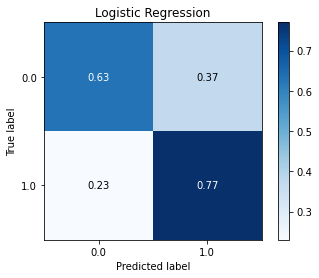

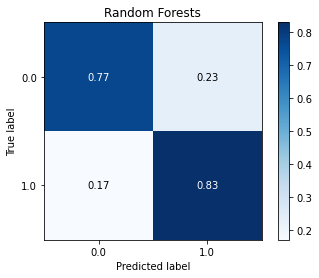

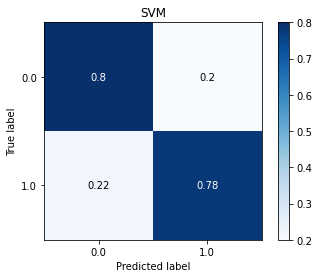

In [122]:
import scikitplot as skplt

plt_1 = skplt.metrics.plot_confusion_matrix(y_test, y_pred,  normalize=True, title='Logistic Regression')
plt_2 = skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf.round(), normalize=True,  title='Random Forests')
plt_3 = skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm, normalize=True, title='SVM')

In [ ]:
##Random Forest is performing better on our data.